## Normalized cost of hydrogen at the export locations

### load necessary files

In [4]:
%run -i ../functions/load_packages.ipynb

metrics_opt30 = "../../pypsa-earth-sec/results/MT_GADM_opt30/csvs/metrics.csv"
metrics_real30 = "../../pypsa-earth-sec/results/MT_GADM_real30/csvs/metrics.csv"
metrics_con30 = "../../pypsa-earth-sec/results/MT_GADM_con30/csvs/metrics.csv"

### 1. Extract normalized cost in optimistic scenario

In [5]:
li=[]
df = pd.read_csv(metrics_opt30, keep_default_na=False,
        na_values=[""])
df=df.set_index('cluster')
df = df.loc[['export', 'total costs']]
df = df.apply(pd.to_numeric)

dfc = [0]
for column in df.columns[1:]:
    dfc.append((df.loc["total costs",column].astype(float)- df.loc["total costs", "30"].astype(float)) / (df.loc["export", column] * (1e+09/33.33)))
dfc = pd.DataFrame(dfc).transpose()
dfc.columns = ['30', '30.1', '30.2', '30.3', '30.4', '30.5']
dfopt = pd.concat([df, dfc], axis=0)
dfopt


,30,30.1,30.2,30.3,30.4,30.5
export,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.000000e+02,2.000000e+02
total costs,2.754276e+09,2.801351e+09,3.083150e+09,3.440314e+09,1.018566e+10,1.794965e+10
0,0.000000e+00,1.569004e+00,2.192274e+00,2.286566e+00,2.476882e+00,2.532308e+00


### 2. Extract normalized cost in realistic scenario

In [6]:
df = pd.read_csv(metrics_real30, keep_default_na=False,
        na_values=[""])
df=df.set_index('cluster')
df = df.loc[['export', 'total costs']]
df = df.apply(pd.to_numeric)

dfc = [0]
for column in df.columns[1:]:
    dfc.append((df.loc["total costs",column].astype(float)- df.loc["total costs", "30"].astype(float)) / (df.loc["export", column] * (1e+09/33.33)))
dfc = pd.DataFrame(dfc).transpose()
dfc.columns = ['30', '30.1', '30.2', '30.3', '30.4', '30.5']
dfreal = pd.concat([df, dfc], axis=0)
dfreal

,30,30.1,30.2,30.3,30.4,30.5
export,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.000000e+02,2.000000e+02
total costs,2.967938e+09,3.022352e+09,3.331147e+09,3.719446e+09,1.098160e+10,1.907140e+10
0,0.000000e+00,1.813616e+00,2.421149e+00,2.504775e+00,2.670953e+00,2.683641e+00


### 3. Extract normalized cost in conservative scenario

In [7]:
df = pd.read_csv(metrics_con30, keep_default_na=False,
        na_values=[""])
df=df.set_index('cluster')
df = df.loc[['export', 'total costs']]
df = df.apply(pd.to_numeric)

dfc = [0]
for column in df.columns[1:]:
    dfc.append((df.loc["total costs",column].astype(float)- df.loc["total costs", "30"].astype(float)) / (df.loc["export", column] * (1e+09/33.33)))
dfc = pd.DataFrame(dfc).transpose()
dfc.columns = ['30', '30.1', '30.2', '30.3', '30.4', '30.5']
dfcon = pd.concat([df, dfc], axis=0)
dfcon

,30,30.1,30.2,30.3,30.4,30.5
export,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.000000e+02,2.000000e+02
total costs,3.054340e+09,3.108480e+09,3.415601e+09,3.817943e+09,1.120721e+10,1.945601e+10
0,0.000000e+00,1.804473e+00,2.408164e+00,2.545087e+00,2.717351e+00,2.733338e+00


(1.5, 3.5)

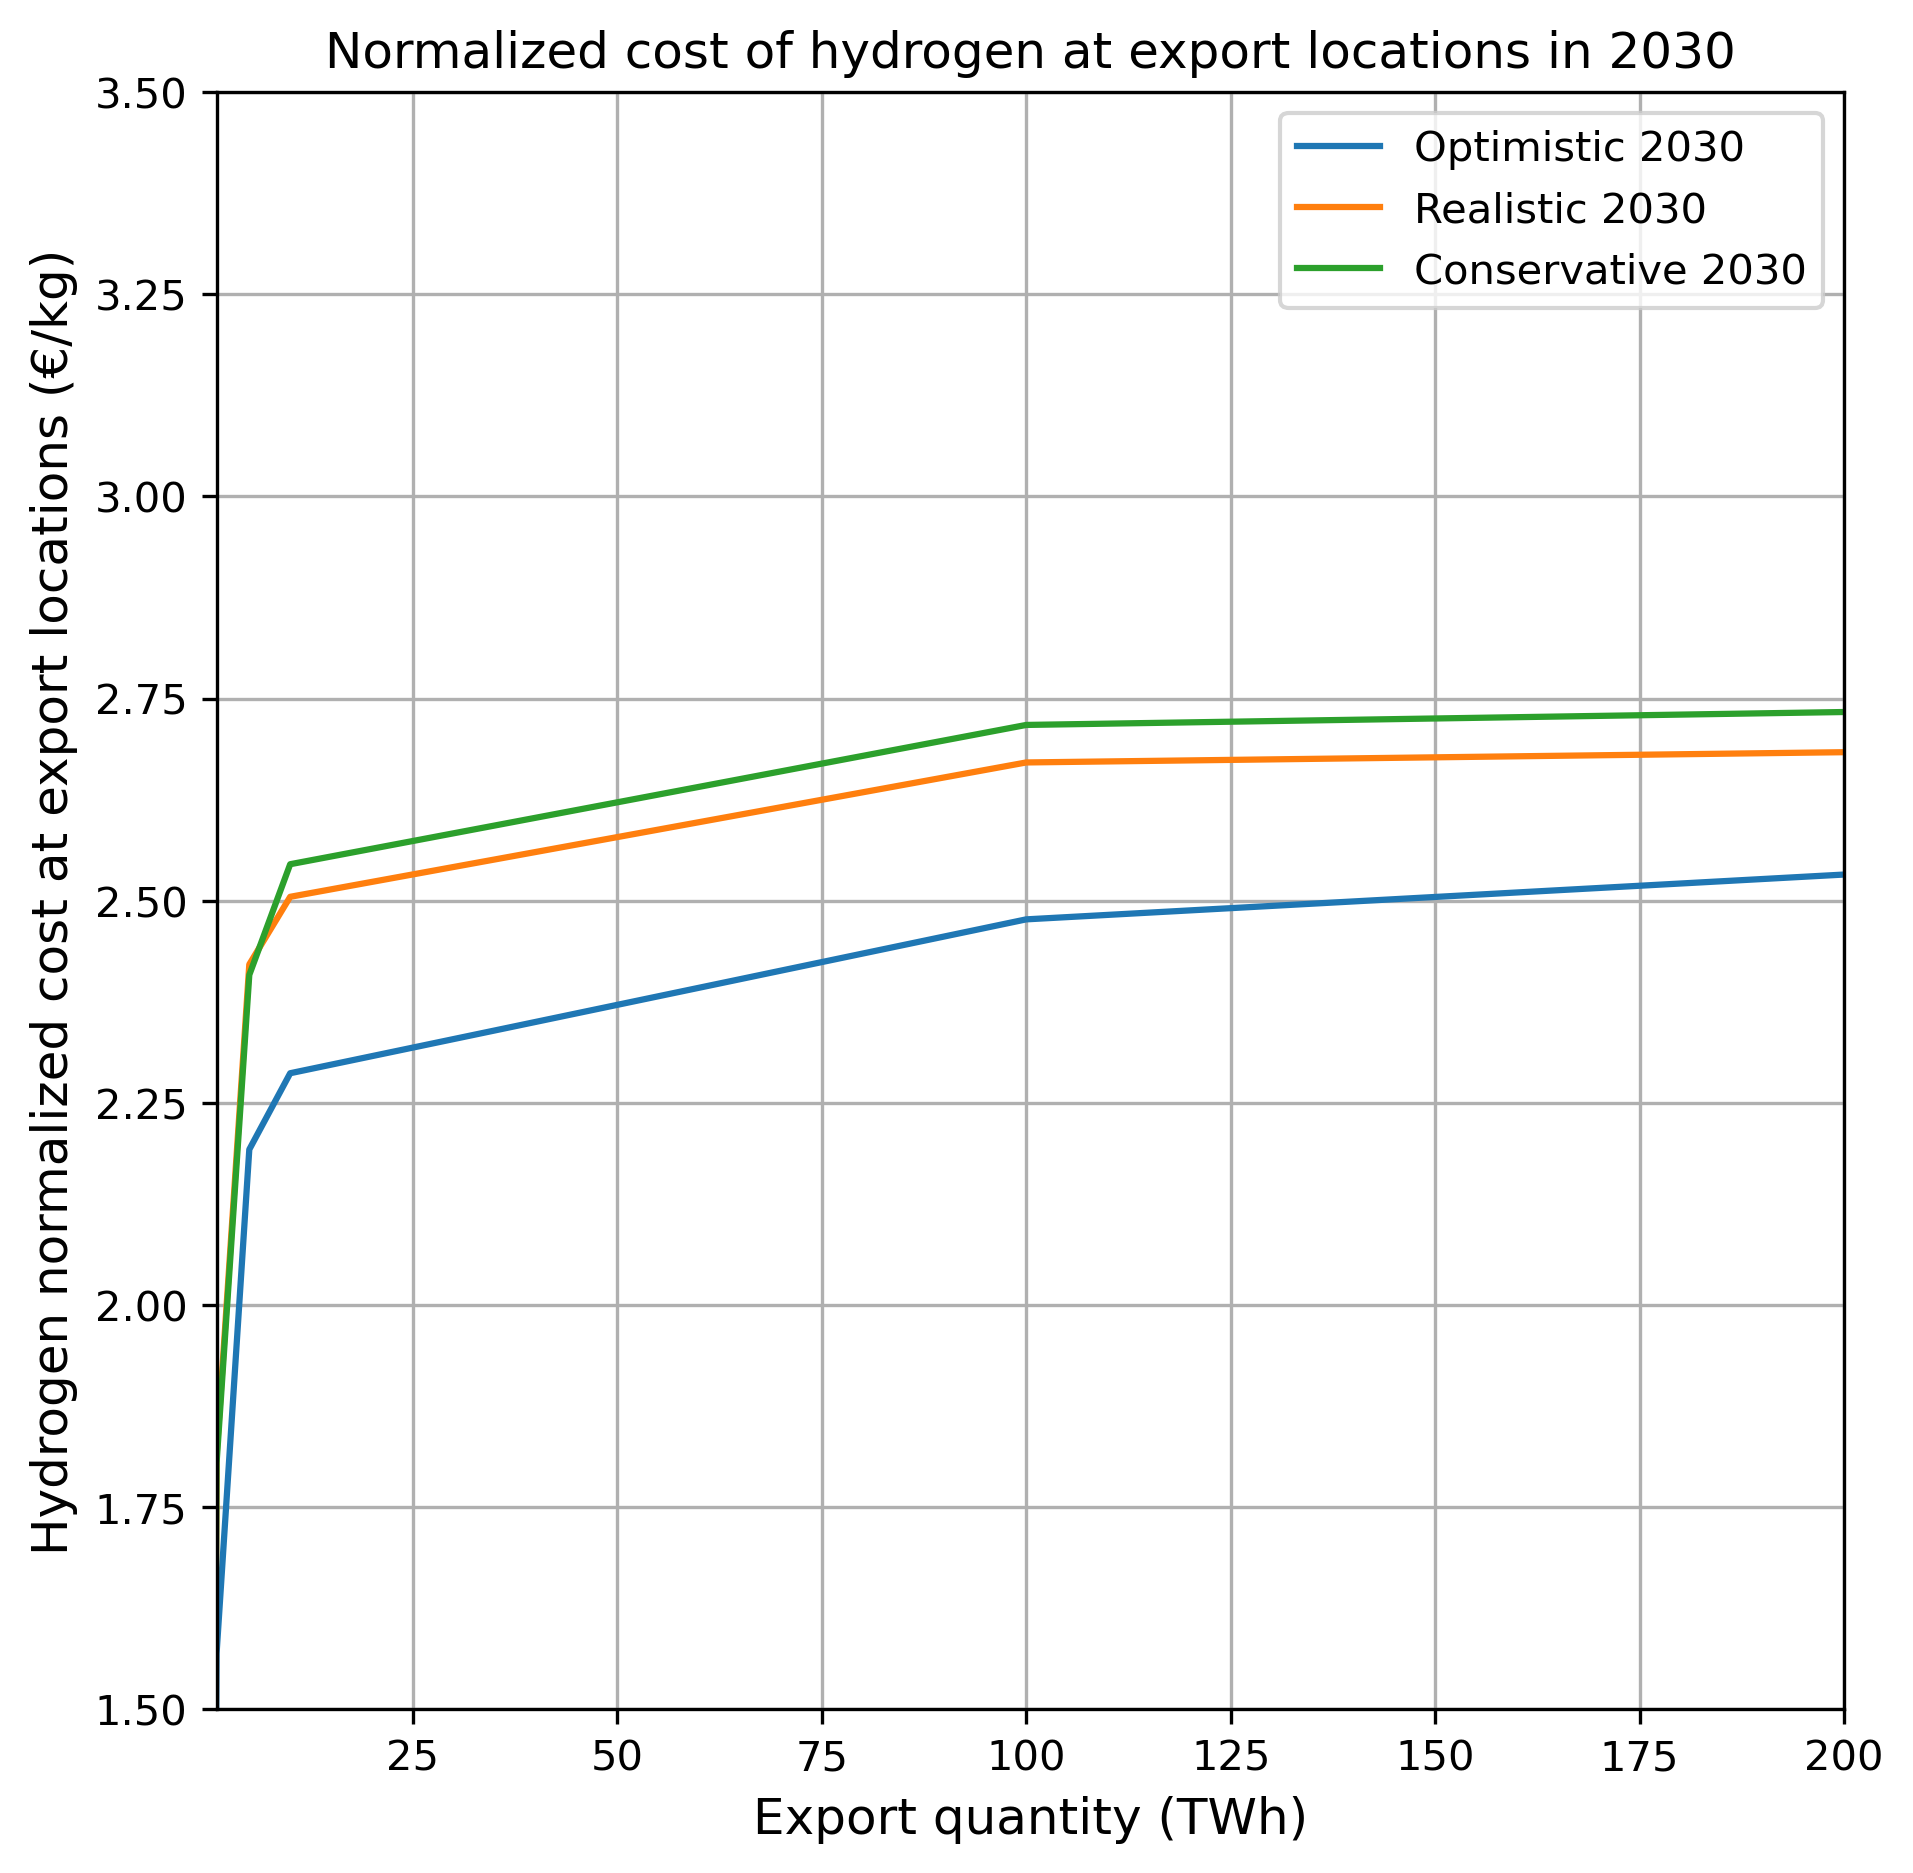

In [13]:
# create figure and axis
fig, ax = plt.subplots(figsize=(7, 7), dpi=300)

#plot optimistic
dfopt.T.plot(ax=ax, x='export', y=0, title= "Normalized cost of hydrogen at export locations in 2030", legend="Optimistic 2030")

#plot realistic
dfreal.T.plot(ax=ax, x='export', y=0, grid=True)

#plot realistic
dfcon.T.plot(ax=ax, x='export', y=0, grid=True)

ax.legend(["Optimistic 2030", "Realistic 2030", "Conservative 2030"]);
ax.set_ylabel('Hydrogen normalized cost at export locations (€/kg)',fontsize=12)
ax.set_xlabel('Export quantity (TWh)',fontsize=12)
ax.set_xlim(1,200)
ax.set_ylim(1.5,3.5)